# MSDS 7331: Data Mining
# Lab 1: Visualization and Data Preprocessing
# 26 May 2019
## Authors: Meredith Ludlow, Anand Rajan, Kristen Rollins, and Tej Tenmattam

---

### Business Understanding

Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import os
print(os.listdir("Data"))

['acs2015_census_tract_data.csv', 'acs2017_county_data.csv', 'acs2017_census_tract_data.csv', 'acs2015_county_data.csv']


Reading every csv file as pandas dataframe

2017 Census Tract Data

In [2]:
df_17_census = pd.read_csv('Data/acs2017_census_tract_data.csv')
df_17_census.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


2017 Census County Data

In [3]:
df_17_county = pd.read_csv('Data/acs2017_county_data.csv')
df_17_county.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [4]:
# get unique values in "State" 
print(set(df_17_census['State']))

{'Hawaii', 'Delaware', 'Virginia', 'Montana', 'Connecticut', 'Wyoming', 'Iowa', 'Oregon', 'Pennsylvania', 'Alaska', 'New Jersey', 'Massachusetts', 'New Mexico', 'South Carolina', 'South Dakota', 'Minnesota', 'Colorado', 'Puerto Rico', 'Kansas', 'Wisconsin', 'Alabama', 'Idaho', 'Oklahoma', 'Rhode Island', 'Maine', 'Illinois', 'Mississippi', 'Ohio', 'Vermont', 'New York', 'Utah', 'Florida', 'Georgia', 'Washington', 'Nebraska', 'Arizona', 'Arkansas', 'Michigan', 'Tennessee', 'Missouri', 'New Hampshire', 'North Carolina', 'Nevada', 'Kentucky', 'West Virginia', 'California', 'Maryland', 'Texas', 'District of Columbia', 'North Dakota', 'Indiana', 'Louisiana'}


In [5]:
# county counts for each state
county = df_17_census[['State','County']].groupby('State').agg('count')
county.sort_values('County', ascending = 0)

,County
State,
California,8057
Texas,5265
New York,4918
Florida,4245
Pennsylvania,3218
Illinois,3123
Ohio,2952
Michigan,2813
North Carolina,2195


In [6]:
# group by state 
agg_df = df_17_census.groupby('State').sum()

# order by total population 
agg_df.sort_values('TotalPop', ascending = 0)

,TractId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
State,,,,,,,,,,,,,,,,,,,,,
California,48784308442329,38982847,19366579,19616268,302436.7,315375.1,44892.6,3313.3,107156.8,2759.2,...,22399.8,20733.1,45715.2,228959.0,17993915,620398.1,109397.2,67760.9,1452.9,62920.2
Texas,253920607467784,27419612,13616977,13802635,202801.5,228527.0,60967.3,1339.6,19979.0,394.9,...,9458.8,9144.9,22393.0,131499.3,12689069,414609.8,70444.0,36390.6,958.8,32215.1
Florida,51244621187724,20278447,9914361,10364086,92946.1,241849.5,62980.4,907.6,9755.7,214.1,...,7415.3,10203.7,25437.6,109921.5,9018570,339459.8,50039.8,26248.3,749.5,30999.0
New York,177351053013647,19798228,9604111,10194117,85416.7,271279.1,75126.7,1549.4,40088.7,145.1,...,30663.7,8843.8,19715.6,159436.6,9467631,379901.5,75897.8,27994.1,713.0,34626.6
Illinois,53335824705154,12854526,6312600,6541926,49471.6,187929.5,53232.0,363.4,14468.4,69.0,...,9741.8,5713.0,13586.4,88953.9,6181653,257640.6,38630.2,14767.4,464.6,26445.4
Pennsylvania,135354110024590,12790505,6260160,6530345,21033.6,245248.3,37292.0,375.7,9474.1,60.0,...,14107.3,4723.6,13608.3,84309.5,6096977,269785.3,33345.0,16119.4,449.6,22520.6
Ohio,115361925769585,11609756,5686081,5923675,11400.6,221391.1,47780.6,479.1,5118.4,84.8,...,7820.7,3853.0,10575.6,68155.4,5488180,244297.7,34850.6,14233.6,418.0,23191.2
Georgia,25858107933248,10201635,4968887,5232748,16878.2,104547.2,63297.9,359.5,6377.5,89.7,...,3654.1,3549.9,9373.8,52735.2,4606329,154053.7,30032.9,10906.2,309.3,15977.4
North Carolina,81440525398412,10052564,4895368,5157196,19018.7,138775.6,46526.9,2364.8,5285.6,117.1,...,4384.0,3096.2,10858.4,52077.2,4571020,172143.5,31173.4,12831.1,354.8,16476.8


In [7]:
# Create a new dataset which contains data of states with top 5 total population
ca = df_17_census.groupby('State').get_group('California')
tx = df_17_census.groupby('State').get_group('Texas')
ny = df_17_census.groupby('State').get_group('New York')
fl = df_17_census.groupby('State').get_group('Florida')
il = df_17_census.groupby('State').get_group('Illinois')
df_17_census_5 = pd.concat([ca,tx,ny,fl,il])
df_17_census_5.head()

,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
3560,6001400100,California,Alameda County,2991,1442,1549,3.8,69.2,2.8,0.0,...,0.5,2.2,20.0,34.8,1543,80.6,6.6,12.8,0.0,4.0
3561,6001400200,California,Alameda County,1997,992,1005,8.9,71.3,0.9,0.3,...,4.4,5.0,11.8,29.2,1231,77.4,10.2,11.6,0.8,3.7
3562,6001400300,California,Alameda County,5123,2383,2740,7.5,67.0,9.4,0.0,...,5.4,4.9,10.3,31.3,3213,73.0,17.8,9.2,0.0,5.5
3563,6001400400,California,Alameda County,3991,1810,2181,9.4,65.8,6.0,0.3,...,4.3,12.8,9.1,30.4,2499,73.9,15.2,10.7,0.3,5.0
3564,6001400500,California,Alameda County,3944,1660,2284,10.3,53.4,24.1,0.0,...,2.9,11.1,14.0,32.4,2587,77.1,14.1,8.8,0.0,2.6


### Data Meaning and Type

| Attribute | Data Type | Description |
|-----------|-----------|-------------|
| TractID | Nominal | Unique identification number for the census tract |
| State | Nominal | U.S. state or territory the tract is located in |
| County | Nominal | County or county-equivalent the tract is located in |
| TotalPop | Integer | Total population of the census area |
| Men | Integer | Number of men living in the census tract |
| Women | Integer | Number of women living in the census tract |
| Hispanic | Decimal | Percentage of population that is Hispanic/Latino |
| White | Decimal | Percentage of population that is white |
| Black | Decimal | Percentage of population that is black |
| Native | Decimal | Percent of population that is Native American |
| Asian | Decimal | Percent of population that is Asian |
| Pacific | Decimal | Percent of population that is Native Hawaiian or other Pacific Islander |
| VotingAgeCitizen | Integer | Number of voting age citizens in the census tract |
| Income | Decimal | Median household income in USD (\$) |
| IncomeErr | Decimal | Median household income error (\$) |
| IncomePerCap | Decimal | Income per capita (\$) |
| IncomePerCapErr | Decimal | Income per capita error (\$) |
| Poverty | Decimal | Percentage of population under the poverty level |
| ChildPoverty | Decimal | Percentage of children under the poverty level |
| Professional | Decimal | Percent employed in management, business, science, and arts |
| Service | Decimal | Percent employed in service jobs |
| Office | Decimal | Percent employed in sales and office jobs |
| Construction | Decimal | Percent employed in natural resources, construction, and maintenance |
| Production | Decimal | Percent employed in production, transportation, and material movement |
| Drive | Decimal | Percent commuting alone in a car, van, or truck |
| Carpool | Decimal | Percent carpooling in a car, van, or truck |
| Transit | Decimal | Percent commuting on public transportation |
| Walk | Decimal | Percent walking to work |
| OtherTransp | Decimal | Percent commuting via other means |
| WorkAtHome | Decimal | Percentage working at home |
| Mean Commute | Decimal | Mean commute time in minutes |
| Employed | Integer | Number of people employed (16+) |
| PrivateWork | Decimal | Percentage employed in private industry |
| PublicWork | Decimal | Percentage employed in public jobs |
| SelfEmployed | Decimal | Percent self-employed
| FamilyWork | Decimal | Percentage in unpaid family work |
| Unemployed | Decimal | Unemployment rate (%) |

### Data Quality

### Simple Statistics

In [8]:
df_17_county.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [9]:
census_tract_income = df_17_census[['TractId', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr']]
census_tract_income.head()

,TractId,Income,IncomeErr,IncomePerCap,IncomePerCapErr
0,1001020100,67826.0,14560.0,33018.0,6294.0
1,1001020200,41287.0,3819.0,18996.0,2453.0
2,1001020300,46806.0,9496.0,21236.0,2562.0
3,1001020400,55895.0,4369.0,28068.0,3190.0
4,1001020500,68143.0,14424.0,36905.0,10706.0


In [10]:
county_income = df_17_county[['CountyId', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr']]
county_income.head()

,CountyId,Income,IncomeErr,IncomePerCap,IncomePerCapErr
0,1001,55317,2838,27824,2024
1,1003,52562,1348,29364,735
2,1005,33368,2551,17561,798
3,1007,43404,3431,20911,1889
4,1009,47412,2630,22021,850


In [11]:
census_tract_mean = census_tract_income['Income'].mean()
census_tract_median = census_tract_income['Income'].median()
print('From 2017 Census Tract data, household mean income is ' + str(census_tract_mean) + ', and household median income is ' +
      str(census_tract_median))

From 2017 Census Tract data, household mean income is 61086.829265280925, and household median income is 54375.0


In [12]:
county_income_mean = county_income['Income'].mean()
county_income_median = county_income['Income'].median()
print('From 2017 County data, household mean income is ' + str(county_income_mean) + ', and household median income is ' +
      str(county_income_median))

From 2017 County data, household mean income is 48994.966770186336, and household median income is 47636.5


### Visualize Attributes

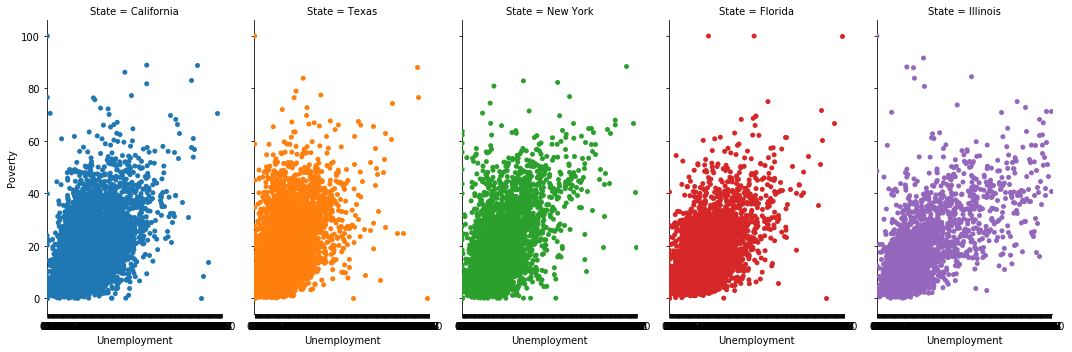

In [13]:
sns.catplot(x="Unemployment", y="Poverty", hue="State",
            col="State", aspect=.6,
            kind="swarm", data=df_17_census_5);

### Explore Joint Attributes

### Explore Attributes and Class

### New Features